In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


## Read the data from CSV

In [2]:
df = pd.read_csv('stage3.csv')

In [3]:
df.describe()

,incident_id,n_killed,n_injured,congressional_district,latitude,longitude,n_guns_involved,state_house_district,state_senate_district
count,2.396770e+05,239677.000000,239677.000000,227733.000000,231754.000000,231754.000000,140226.000000,200905.000000,207342.00000
mean,5.593343e+05,0.252290,0.494007,8.001265,37.546598,-89.338348,1.372442,55.447132,20.47711
std,2.931287e+05,0.521779,0.729952,8.480835,5.130763,14.359546,4.678202,42.048117,14.20456
min,9.211400e+04,0.000000,0.000000,0.000000,19.111400,-171.429000,1.000000,1.000000,1.00000
25%,3.085450e+05,0.000000,0.000000,2.000000,33.903400,-94.158725,1.000000,21.000000,9.00000
50%,5.435870e+05,0.000000,0.000000,5.000000,38.570600,-86.249600,1.000000,47.000000,19.00000
75%,8.172280e+05,0.000000,1.000000,10.000000,41.437375,-80.048625,1.000000,84.000000,30.00000
max,1.083472e+06,50.000000,53.000000,53.000000,71.336800,97.433100,400.000000,901.000000,94.00000


In [4]:
df.columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed',
       'n_injured', 'incident_url', 'source_url',
       'incident_url_fields_missing', 'congressional_district', 'gun_stolen',
       'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'n_guns_involved', 'notes',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_name', 'participant_relationship', 'participant_status',
       'participant_type', 'sources', 'state_house_district',
       'state_senate_district'],
      dtype='object')

In [5]:
# Drop useless columns
df = df.drop(['incident_url', 'source_url', 'incident_url_fields_missing', 'sources', 'notes', 'address', 'participant_name', 'congressional_district','state_house_district', 'state_senate_district', 'latitude','longitude'], axis=1)

In [6]:
df.head()

,incident_id,date,state,city_or_county,n_killed,n_injured,gun_stolen,gun_type,incident_characteristics,location_description,n_guns_involved,participant_age,participant_age_group,participant_gender,participant_relationship,participant_status,participant_type
0,461105,2013-01-01,Pennsylvania,Mckeesport,0,4,NaN,NaN,Shot - Wounded/Injured||Mass Shooting (4+ vict...,NaN,NaN,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...
1,460726,2013-01-01,California,Hawthorne,1,3,NaN,NaN,"Shot - Wounded/Injured||Shot - Dead (murder, a...",NaN,NaN,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...
2,478855,2013-01-01,Ohio,Lorain,1,3,0::Unknown||1::Unknown,0::Unknown||1::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",Cotton Club,2.0,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...
3,478925,2013-01-05,Colorado,Aurora,4,0,NaN,NaN,"Shot - Dead (murder, accidental, suicide)||Off...",NaN,NaN,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...
4,478959,2013-01-07,North Carolina,Greensboro,2,2,0::Unknown||1::Unknown,0::Handgun||1::Handgun,"Shot - Wounded/Injured||Shot - Dead (murder, a...",NaN,2.0,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...


In [7]:
# string clean up in columns to remove numbers using regex 
df['participant_gender'] =  df['participant_gender'].str.replace('[^A-Za-z\\|]+', '')
df['participant_status'] =  df['participant_status'].str.replace('[^A-Za-z\\|]+', '')
df['participant_age_group'] =  df['participant_age_group'].str.replace('[^A-Za-z\\|]+', '')
df['participant_type'] =  df['participant_type'].str.replace('[^A-Za-z\\|]+', '')

In [8]:
df.head()

,incident_id,date,state,city_or_county,n_killed,n_injured,gun_stolen,gun_type,incident_characteristics,location_description,n_guns_involved,participant_age,participant_age_group,participant_gender,participant_relationship,participant_status,participant_type
0,461105,2013-01-01,Pennsylvania,Mckeesport,0,4,NaN,NaN,Shot - Wounded/Injured||Mass Shooting (4+ vict...,NaN,NaN,0::20,Adult||Adult||Adult||Adult||Adult,Male||Male||Male||Female,NaN,Arrested||Injured||Injured||Injured||Injured,Victim||Victim||Victim||Victim||SubjectSuspect
1,460726,2013-01-01,California,Hawthorne,1,3,NaN,NaN,"Shot - Wounded/Injured||Shot - Dead (murder, a...",NaN,NaN,0::20,Adult||Adult||Adult||Adult,Male,NaN,Killed||Injured||Injured||Injured,Victim||Victim||Victim||Victim||SubjectSuspect
2,478855,2013-01-01,Ohio,Lorain,1,3,0::Unknown||1::Unknown,0::Unknown||1::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",Cotton Club,2.0,0::25||1::31||2::33||3::34||4::33,Adult||Adult||Adult||Adult||Adult,Male||Male||Male||Male||Male,NaN,InjuredUnharmedArrested||UnharmedArrested||Kil...,SubjectSuspect||SubjectSuspect||Victim||Victim...
3,478925,2013-01-05,Colorado,Aurora,4,0,NaN,NaN,"Shot - Dead (murder, accidental, suicide)||Off...",NaN,NaN,0::29||1::33||2::56||3::33,Adult||Adult||Adult||Adult,Female||Male||Male||Male,NaN,Killed||Killed||Killed||Killed,Victim||Victim||Victim||SubjectSuspect
4,478959,2013-01-07,North Carolina,Greensboro,2,2,0::Unknown||1::Unknown,0::Handgun||1::Handgun,"Shot - Wounded/Injured||Shot - Dead (murder, a...",NaN,2.0,0::18||1::46||2::14||3::47,Adult||Adult||Teen||Adult,Female||Male||Male||Female,3::Family,Injured||Injured||Killed||Killed,Victim||Victim||Victim||SubjectSuspect


In [9]:
# generate lists (arrays) from string columns 
df['gender_list'] = df.participant_gender.str.split('\\|\\|')
df['status_list'] = df.participant_status.str.split('\\|\\|')
df['age_list'] = df.participant_age_group.str.split('\\|\\|')
df['type_list'] = df.participant_type.str.split('\\|\\|')

In [10]:
df

,incident_id,date,state,city_or_county,n_killed,n_injured,gun_stolen,gun_type,incident_characteristics,location_description,...,participant_age,participant_age_group,participant_gender,participant_relationship,participant_status,participant_type,gender_list,status_list,age_list,type_list
0,461105,2013-01-01,Pennsylvania,Mckeesport,0,4,NaN,NaN,Shot - Wounded/Injured||Mass Shooting (4+ vict...,NaN,...,0::20,Adult||Adult||Adult||Adult||Adult,Male||Male||Male||Female,NaN,Arrested||Injured||Injured||Injured||Injured,Victim||Victim||Victim||Victim||SubjectSuspect,"[Male, Male, Male, Female]","[Arrested, Injured, Injured, Injured, Injured]","[Adult, Adult, Adult, Adult, Adult]","[Victim, Victim, Victim, Victim, SubjectSuspect]"
1,460726,2013-01-01,California,Hawthorne,1,3,NaN,NaN,"Shot - Wounded/Injured||Shot - Dead (murder, a...",NaN,...,0::20,Adult||Adult||Adult||Adult,Male,NaN,Killed||Injured||Injured||Injured,Victim||Victim||Victim||Victim||SubjectSuspect,[Male],"[Killed, Injured, Injured, Injured]","[Adult, Adult, Adult, Adult]","[Victim, Victim, Victim, Victim, SubjectSuspect]"
2,478855,2013-01-01,Ohio,Lorain,1,3,0::Unknown||1::Unknown,0::Unknown||1::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",Cotton Club,...,0::25||1::31||2::33||3::34||4::33,Adult||Adult||Adult||Adult||Adult,Male||Male||Male||Male||Male,NaN,InjuredUnharmedArrested||UnharmedArrested||Kil...,SubjectSuspect||SubjectSuspect||Victim||Victim...,"[Male, Male, Male, Male, Male]","[InjuredUnharmedArrested, UnharmedArrested, Ki...","[Adult, Adult, Adult, Adult, Adult]","[SubjectSuspect, SubjectSuspect, Victim, Victi..."
3,478925,2013-01-05,Colorado,Aurora,4,0,NaN,NaN,"Shot - Dead (murder, accidental, suicide)||Off...",NaN,...,0::29||1::33||2::56||3::33,Adult||Adult||Adult||Adult,Female||Male||Male||Male,NaN,Killed||Killed||Killed||Killed,Victim||Victim||Victim||SubjectSuspect,"[Female, Male, Male, Male]","[Killed, Killed, Killed, Killed]","[Adult, Adult, Adult, Adult]","[Victim, Victim, Victim, SubjectSuspect]"
4,478959,2013-01-07,North Carolina,Greensboro,2,2,0::Unknown||1::Unknown,0::Handgun||1::Handgun,"Shot - Wounded/Injured||Shot - Dead (murder, a...",NaN,...,0::18||1::46||2::14||3::47,Adult||Adult||Teen||Adult,Female||Male||Male||Female,3::Family,Injured||Injured||Killed||Killed,Victim||Victim||Victim||SubjectSuspect,"[Female, Male, Male, Female]","[Injured, Injured, Killed, Killed]","[Adult, Adult, Teen, Adult]","[Victim, Victim, Victim, SubjectSuspect]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239672,1083142,2018-03-31,Louisiana,Rayne,0,0,0::Unknown,0::Unknown,Shots Fired - No Injuries,NaN,...,0::25,Adult,Female,NaN,UnharmedArrested,SubjectSuspect,[Female],[UnharmedArrested],[Adult],[SubjectSuspect]
239673,1083139,2018-03-31,Louisiana,Natchitoches,1,0,0::Unknown,0::Unknown,"Shot - Dead (murder, accidental, suicide)||Ins...",Shop Rite,...,1::21,Adult||Adult,Male||Male,NaN,Killed||UnharmedArrested,Victim||SubjectSuspect,"[Male, Male]","[Killed, UnharmedArrested]","[Adult, Adult]","[Victim, SubjectSuspect]"
239674,1083151,2018-03-31,Louisiana,Gretna,0,1,0::Unknown,0::Unknown,Shot - Wounded/Injured,NaN,...,0::21,Adult,Male,NaN,Injured,Victim,[Male],[Injured],[Adult],[Victim]
239675,1082514,2018-03-31,Texas,Houston,1,0,0::Unknown,0::Unknown,"Shot - Dead (murder, accidental, suicide)",Vanderbilt Court apartments,...,0::42,Adult,Male,NaN,Killed,Victim,[Male],[Killed],[Adult],[Victim]


In [11]:
# drop rows where there is no info on gender or status or age or type
df = df[df['gender_list'].notna()]
df = df[df['status_list'].notna()]
df = df[df['age_list'].notna()]
df = df[df['type_list'].notna()]


In [12]:
df = df.drop(['participant_gender','participant_status','participant_age_group','participant_type'], axis=1)

In [13]:
# check the count of null rows for each column
df.isna().sum()

incident_id                      0
date                             0
state                            0
city_or_county                   0
n_killed                         0
n_injured                        0
gun_stolen                   79637
gun_type                     79612
incident_characteristics       232
location_description        158744
n_guns_involved              79612
participant_age              46431
participant_relationship    176944
gender_list                      0
status_list                      0
age_list                         0
type_list                        0
dtype: int64

In [14]:
# count number of males from list of gender
df['male'] = df['gender_list'].apply(lambda x: x.count('Male'))
df['female'] = df['gender_list'].apply(lambda x: x.count('Female'))

In [15]:
df['Adult'] = df['age_list'].apply(lambda x: x.count('Adult'))
df['Teen'] = df['age_list'].apply(lambda x: x.count('Teen'))
df['Child'] = df['age_list'].apply(lambda x: x.count('Child'))


In [16]:
df['Victim'] = df['type_list'].apply(lambda x: x.count('Victim'))
df['Suspect'] = df['type_list'].apply(lambda x: sum('Suspect' in s in s for s in x))


In [17]:
df['Arrested'] = df['status_list'].apply(lambda x: sum('Arrested' in s in s for s in x))
df['Killed'] = df['status_list'].apply(lambda x:sum('Killed' in s in s for s in x))
df['Injured'] = df['status_list'].apply(lambda x: sum('Injured' in s in s for s in x))



In [18]:
df.head()

,incident_id,date,state,city_or_county,n_killed,n_injured,gun_stolen,gun_type,incident_characteristics,location_description,...,male,female,Adult,Teen,Child,Victim,Suspect,Arrested,Killed,Injured
0,461105,2013-01-01,Pennsylvania,Mckeesport,0,4,NaN,NaN,Shot - Wounded/Injured||Mass Shooting (4+ vict...,NaN,...,3,1,5,0,0,4,1,1,0,4
1,460726,2013-01-01,California,Hawthorne,1,3,NaN,NaN,"Shot - Wounded/Injured||Shot - Dead (murder, a...",NaN,...,1,0,4,0,0,4,1,0,1,3
2,478855,2013-01-01,Ohio,Lorain,1,3,0::Unknown||1::Unknown,0::Unknown||1::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",Cotton Club,...,5,0,5,0,0,3,2,2,1,3
3,478925,2013-01-05,Colorado,Aurora,4,0,NaN,NaN,"Shot - Dead (murder, accidental, suicide)||Off...",NaN,...,3,1,4,0,0,3,1,0,4,0
4,478959,2013-01-07,North Carolina,Greensboro,2,2,0::Unknown||1::Unknown,0::Handgun||1::Handgun,"Shot - Wounded/Injured||Shot - Dead (murder, a...",NaN,...,2,2,3,1,0,3,1,0,2,2


In [19]:
df[['incident_characteristics']]

,incident_characteristics
0,Shot - Wounded/Injured||Mass Shooting (4+ vict...
1,"Shot - Wounded/Injured||Shot - Dead (murder, a..."
2,"Shot - Wounded/Injured||Shot - Dead (murder, a..."
3,"Shot - Dead (murder, accidental, suicide)||Off..."
4,"Shot - Wounded/Injured||Shot - Dead (murder, a..."
...,...
239672,Shots Fired - No Injuries
239673,"Shot - Dead (murder, accidental, suicide)||Ins..."
239674,Shot - Wounded/Injured
239675,"Shot - Dead (murder, accidental, suicide)"


In [20]:
# find secondry and primary characteristics 
df['incident_characteristics_list'] = df.incident_characteristics.str.split('\\|')
df = df[df['incident_characteristics_list'].notna()]


In [21]:
df['primary_characteristic'] = df['incident_characteristics_list'].apply(lambda x: x[0])
df['secondry_characteristic'] = df['incident_characteristics_list'].apply(lambda x: x[1] if len(x) > 1 else None )

In [22]:
df

,incident_id,date,state,city_or_county,n_killed,n_injured,gun_stolen,gun_type,incident_characteristics,location_description,...,Teen,Child,Victim,Suspect,Arrested,Killed,Injured,incident_characteristics_list,primary_characteristic,secondry_characteristic
0,461105,2013-01-01,Pennsylvania,Mckeesport,0,4,NaN,NaN,Shot - Wounded/Injured||Mass Shooting (4+ vict...,NaN,...,0,0,4,1,1,0,4,"[Shot - Wounded/Injured, , Mass Shooting (4+ v...",Shot - Wounded/Injured,
1,460726,2013-01-01,California,Hawthorne,1,3,NaN,NaN,"Shot - Wounded/Injured||Shot - Dead (murder, a...",NaN,...,0,0,4,1,0,1,3,"[Shot - Wounded/Injured, , Shot - Dead (murder...",Shot - Wounded/Injured,
2,478855,2013-01-01,Ohio,Lorain,1,3,0::Unknown||1::Unknown,0::Unknown||1::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",Cotton Club,...,0,0,3,2,2,1,3,"[Shot - Wounded/Injured, , Shot - Dead (murder...",Shot - Wounded/Injured,
3,478925,2013-01-05,Colorado,Aurora,4,0,NaN,NaN,"Shot - Dead (murder, accidental, suicide)||Off...",NaN,...,0,0,3,1,0,4,0,"[Shot - Dead (murder, accidental, suicide), , ...","Shot - Dead (murder, accidental, suicide)",
4,478959,2013-01-07,North Carolina,Greensboro,2,2,0::Unknown||1::Unknown,0::Handgun||1::Handgun,"Shot - Wounded/Injured||Shot - Dead (murder, a...",NaN,...,1,0,3,1,0,2,2,"[Shot - Wounded/Injured, , Shot - Dead (murder...",Shot - Wounded/Injured,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239672,1083142,2018-03-31,Louisiana,Rayne,0,0,0::Unknown,0::Unknown,Shots Fired - No Injuries,NaN,...,0,0,0,1,1,0,0,[Shots Fired - No Injuries],Shots Fired - No Injuries,None
239673,1083139,2018-03-31,Louisiana,Natchitoches,1,0,0::Unknown,0::Unknown,"Shot - Dead (murder, accidental, suicide)||Ins...",Shop Rite,...,0,0,1,1,1,1,0,"[Shot - Dead (murder, accidental, suicide), , ...","Shot - Dead (murder, accidental, suicide)",
239674,1083151,2018-03-31,Louisiana,Gretna,0,1,0::Unknown,0::Unknown,Shot - Wounded/Injured,NaN,...,0,0,1,0,0,0,1,[Shot - Wounded/Injured],Shot - Wounded/Injured,None
239675,1082514,2018-03-31,Texas,Houston,1,0,0::Unknown,0::Unknown,"Shot - Dead (murder, accidental, suicide)",Vanderbilt Court apartments,...,0,0,1,0,0,1,0,"[Shot - Dead (murder, accidental, suicide)]","Shot - Dead (murder, accidental, suicide)",None


In [23]:
df.primary_characteristic.value_counts()

Shot - Wounded/Injured                                                                                  82571
Shot - Dead (murder, accidental, suicide)                                                               43779
Non-Shooting Incident                                                                                   31765
Shots Fired - No Injuries                                                                               17348
Armed robbery with injury/death and/or evidence of DGU found                                             6319
Institution/Group/Business                                                                               2946
Home Invasion                                                                                            1144
Possession (gun(s) found during commission of other crimes)                                              1084
Drug involvement                                                                                          868
Brandishin

In [24]:
df.secondry_characteristic.value_counts()

                                                                                                        117498
Brandishing/flourishing/open carry/lost/found                                                              201
Officer Involved Incident                                                                                  146
Armed robbery with injury/death and/or evidence of DGU found                                               131
Shot - Dead (murder, accidental, suicide)                                                                  126
Accidental Shooting                                                                                        113
Possession (gun(s) found during commission of other crimes)                                                101
Home Invasion                                                                                               84
Suicide^                                                                                                    82
D

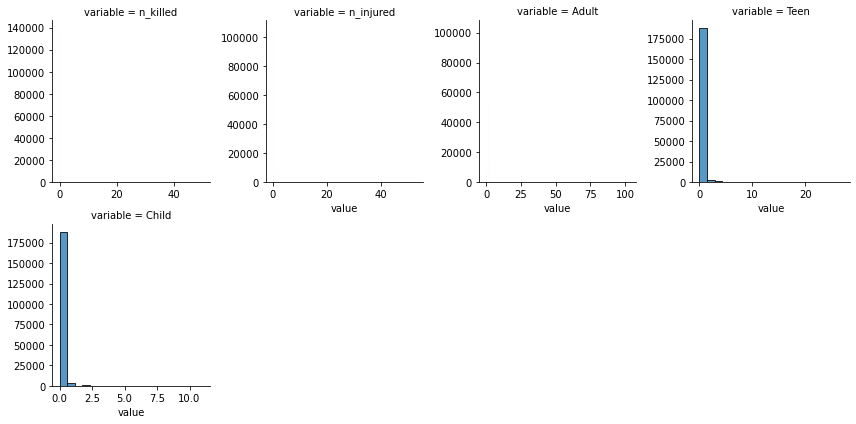

In [25]:
# histogram of numerical columns
df1 = pd.DataFrame(data=df, columns=['n_killed','n_injured','Adult','Teen','Child'])
#Permet de tracer les courbes de distribution de toutes les variables
nd = pd.melt(df, value_vars =df1 )
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.histplot, 'value')
n1

In [ ]:
df


In [28]:
# dependency check for primary cause vs n_killed
stat, p, dof, expected = stats.chi2_contingency(pd.crosstab(df['primary_characteristic'],df['n_killed']))
prob = 0.95
critical = stats.chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print( 'primary_characteristic is '+'Dependent (reject H0)' + ' to n_killed')
else:
    print('primary_characteristic ' +'Independent (fail to reject H0)' + + 'from n_killed')

primary_characteristic is Dependent (reject H0) to n_killed


In [29]:
# ndependency check for secondry vs n_killed

stat, p, dof, expected = stats.chi2_contingency(pd.crosstab(df['secondry_characteristic'],df['n_killed']))
prob = 0.95
critical = stats.chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print( 'secondry_characteristic '+'Dependent (reject H0)' + 'to n_killed')
else:
    print('secondry_characteristic ' +'Independent (fail to reject H0)' + 'from n_killed')

secondry_characteristic Dependent (reject H0)to n_killed


In [30]:
# dependency check for male participants vs n_killed

stat, p, dof, expected = stats.chi2_contingency(pd.crosstab(df['male'],df['n_killed']))
prob = 0.95
critical = stats.chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print( 'male '+'Dependent (reject H0)')
else:
    print('male ' +'Independent (fail to reject H0)')
print (p)

male Dependent (reject H0)
0.0


In [31]:
# dependency check for female participant to n_killed

stat, p, dof, expected = stats.chi2_contingency(pd.crosstab(df['female'],df['n_killed']))
prob = 0.95
critical = stats.chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print( 'female '+'Dependent (reject H0)')
else:
    print('female ' +'Independent (fail to reject H0)')

female Dependent (reject H0)


In [32]:
df.columns


Index(['incident_id', 'date', 'state', 'city_or_county', 'n_killed',
       'n_injured', 'gun_stolen', 'gun_type', 'incident_characteristics',
       'location_description', 'n_guns_involved', 'participant_age',
       'participant_relationship', 'gender_list', 'status_list', 'age_list',
       'type_list', 'male', 'female', 'Adult', 'Teen', 'Child', 'Victim',
       'Suspect', 'Arrested', 'Killed', 'Injured',
       'incident_characteristics_list', 'primary_characteristic',
       'secondry_characteristic'],
      dtype='object')

In [33]:
df1 = df[['n_killed','n_injured','gun_stolen','male','female','Adult','Teen','Child']]

<AxesSubplot:>

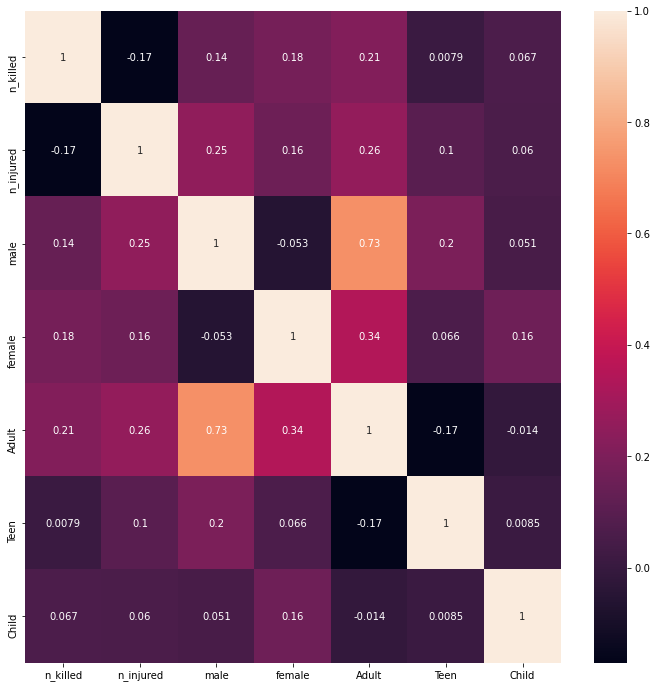

In [34]:
corr1 = df[df1.columns.values].corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr1, annot=True)

In [35]:
# throw out columns where the lenght of lists are not equal
def equal_lengt(a,b,c,d):
    if len(a) == len(b) == len(c) == len(d):
        return 1
    else:
        return 0

In [36]:
df['equal'] = df.apply(lambda x: equal_lengt(x.gender_list, x.type_list, x.status_list, x.age_list), axis=1)

In [37]:
df2 = df.where(df.equal == 1)

In [38]:
df2 = df2[df2['equal'].notna()]


In [39]:
df2.head()

,incident_id,date,state,city_or_county,n_killed,n_injured,gun_stolen,gun_type,incident_characteristics,location_description,...,Child,Victim,Suspect,Arrested,Killed,Injured,incident_characteristics_list,primary_characteristic,secondry_characteristic,equal
2,478855.0,2013-01-01,Ohio,Lorain,1.0,3.0,0::Unknown||1::Unknown,0::Unknown||1::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",Cotton Club,...,0.0,3.0,2.0,2.0,1.0,3.0,"[Shot - Wounded/Injured, , Shot - Dead (murder...",Shot - Wounded/Injured,,1.0
3,478925.0,2013-01-05,Colorado,Aurora,4.0,0.0,NaN,NaN,"Shot - Dead (murder, accidental, suicide)||Off...",NaN,...,0.0,3.0,1.0,0.0,4.0,0.0,"[Shot - Dead (murder, accidental, suicide), , ...","Shot - Dead (murder, accidental, suicide)",,1.0
4,478959.0,2013-01-07,North Carolina,Greensboro,2.0,2.0,0::Unknown||1::Unknown,0::Handgun||1::Handgun,"Shot - Wounded/Injured||Shot - Dead (murder, a...",NaN,...,0.0,3.0,1.0,0.0,2.0,2.0,"[Shot - Wounded/Injured, , Shot - Dead (murder...",Shot - Wounded/Injured,,1.0
5,478948.0,2013-01-07,Oklahoma,Tulsa,4.0,0.0,NaN,NaN,"Shot - Dead (murder, accidental, suicide)||Hom...",Fairmont Terrace,...,0.0,4.0,2.0,2.0,4.0,0.0,"[Shot - Dead (murder, accidental, suicide), , ...","Shot - Dead (murder, accidental, suicide)",,1.0
6,479363.0,2013-01-19,New Mexico,Albuquerque,5.0,0.0,0::Unknown||1::Unknown,0::22 LR||1::223 Rem [AR-15],"Shot - Dead (murder, accidental, suicide)||Mas...",NaN,...,3.0,5.0,1.0,1.0,5.0,0.0,"[Shot - Dead (murder, accidental, suicide), , ...","Shot - Dead (murder, accidental, suicide)",,1.0


In [57]:
# counts words c1 in a and c2 in b and returns the count
def get_count(a,b,c1,c2):
    count = 0 
    for index,i in enumerate(a):
        if (i == c1) and (c2 in b[index] ):
            count = count + 1 
    return count 
    

In [58]:
# call function get_count on each row using lambda 
df2['MaleVictim'] = df2.apply(lambda x: get_count(x.gender_list, x.type_list, 'Male', 'Victim'), axis=1)
df2['FemaleVictim'] = df2.apply(lambda x: get_count(x.gender_list, x.type_list, 'Female', 'Victim'), axis=1)
df2['MaleSuspect'] = df2.apply(lambda x: get_count(x.gender_list, x.type_list, 'Male', 'Suspect'), axis=1)
df2['FemaleSuspect'] = df2.apply(lambda x: get_count(x.gender_list, x.type_list, 'Female', 'Suspect'), axis=1)
df2['ChildVictim'] = df2.apply(lambda x: get_count(x.age_list, x.type_list, 'Child', 'Victim'), axis=1)
df2['ChildSuspect'] = df2.apply(lambda x: get_count(x.age_list, x.type_list, 'Child', 'Suspect'), axis=1)
df2['TeenVictim'] = df2.apply(lambda x: get_count(x.age_list, x.type_list, 'Teen', 'Victim'), axis=1)
df2['TeenSuspect'] = df2.apply(lambda x: get_count(x.age_list, x.type_list, 'Teen', 'Suspect'), axis=1)
df2['AdultVictim'] = df2.apply(lambda x: get_count(x.age_list, x.type_list, 'Adult', 'Victim'), axis=1)
df2['AdultSuspect'] = df2.apply(lambda x: get_count(x.age_list, x.type_list, 'Adult', 'Suspect'), axis=1)

In [59]:
df2.describe()

,incident_id,n_killed,n_injured,n_guns_involved,male,female,Adult,Teen,Child,Victim,...,FealeVictim,MaleSuspect,FemaleSuspect,ChildVictim,ChildSuspect,TeenVictim,TeenSuspect,AdultVictim,AdultSuspect,FemaleVictim
count,1.662380e+05,166238.000000,166238.000000,98258.000000,166238.000000,166238.000000,166238.000000,166238.000000,166238.000000,166238.000000,...,166238.000000,166238.000000,166238.000000,166238.000000,166238.000000,166238.000000,166238.000000,166238.000000,166238.000000,166238.000000
mean,5.599166e+05,0.317232,0.505739,1.321358,1.449488,0.208075,1.521577,0.115882,0.019243,0.824595,...,0.149797,0.774618,0.058266,0.016885,0.002358,0.058627,0.057285,0.749690,0.772465,0.149924
std,2.920994e+05,0.550491,0.680628,3.211621,0.948614,0.476059,1.013317,0.418187,0.162569,0.733242,...,0.404634,0.850256,0.257396,0.148858,0.049241,0.271710,0.296918,0.705893,0.868054,0.404743
min,9.211400e+04,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.127590e+05,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.468625e+05,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,8.150945e+05,1.000000,1.000000,1.000000,2.000000,0.000000,2.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.083435e+06,17.000000,17.000000,400.000000,60.000000,18.000000,63.000000,27.000000,8.000000,34.000000,...,18.000000,60.000000,7.000000,8.000000,2.000000,27.000000,6.000000,13.000000,63.000000,18.000000


In [64]:
df2.columns


Index(['incident_id', 'date', 'state', 'city_or_county', 'n_killed',
       'n_injured', 'gun_stolen', 'gun_type', 'incident_characteristics',
       'location_description', 'n_guns_involved', 'participant_age',
       'participant_relationship', 'gender_list', 'status_list', 'age_list',
       'type_list', 'male', 'female', 'Adult', 'Teen', 'Child', 'Victim',
       'Suspect', 'Arrested', 'Killed', 'Injured',
       'incident_characteristics_list', 'primary_characteristic',
       'secondry_characteristic', 'equal', 'MaleVictim', 'FealeVictim',
       'MaleSuspect', 'FemaleSuspect', 'ChildVictim', 'ChildSuspect',
       'TeenVictim', 'TeenSuspect', 'AdultVictim', 'AdultSuspect',
       'FemaleVictim'],
      dtype='object')

In [65]:
df3 = df2[['state','n_killed','n_injured','primary_characteristic','MaleVictim', 'FealeVictim',
       'MaleSuspect', 'FemaleSuspect', 'ChildVictim', 'ChildSuspect',
       'TeenVictim', 'TeenSuspect', 'AdultVictim', 'AdultSuspect',
       'FemaleVictim']]

In [66]:
df3.head()

,state,n_killed,n_injured,primary_characteristic,MaleVictim,FealeVictim,MaleSuspect,FemaleSuspect,ChildVictim,ChildSuspect,TeenVictim,TeenSuspect,AdultVictim,AdultSuspect,FemaleVictim
2,Ohio,1.0,3.0,Shot - Wounded/Injured,3,0,2,0,0,0,0,0,3,2,0
3,Colorado,4.0,0.0,"Shot - Dead (murder, accidental, suicide)",2,1,1,0,0,0,0,0,3,1,1
4,North Carolina,2.0,2.0,Shot - Wounded/Injured,2,1,0,1,0,0,1,0,2,1,1
5,Oklahoma,4.0,0.0,"Shot - Dead (murder, accidental, suicide)",0,4,2,0,0,0,0,0,4,2,4
6,New Mexico,5.0,0.0,"Shot - Dead (murder, accidental, suicide)",2,3,1,0,3,0,0,1,2,0,3


In [93]:
df4 = df3.groupby('state')['MaleVictim','FemaleVictim','MaleSuspect','FemaleSuspect'].agg('mean')

<ipython-input-93-de6bffa5bbfb>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df4 = df3.groupby('state')['MaleVictim','FemaleVictim','MaleSuspect','FemaleSuspect'].agg('mean')


In [94]:
df4.columns


Index(['MaleVictim', 'FemaleVictim', 'MaleSuspect', 'FemaleSuspect'], dtype='object')

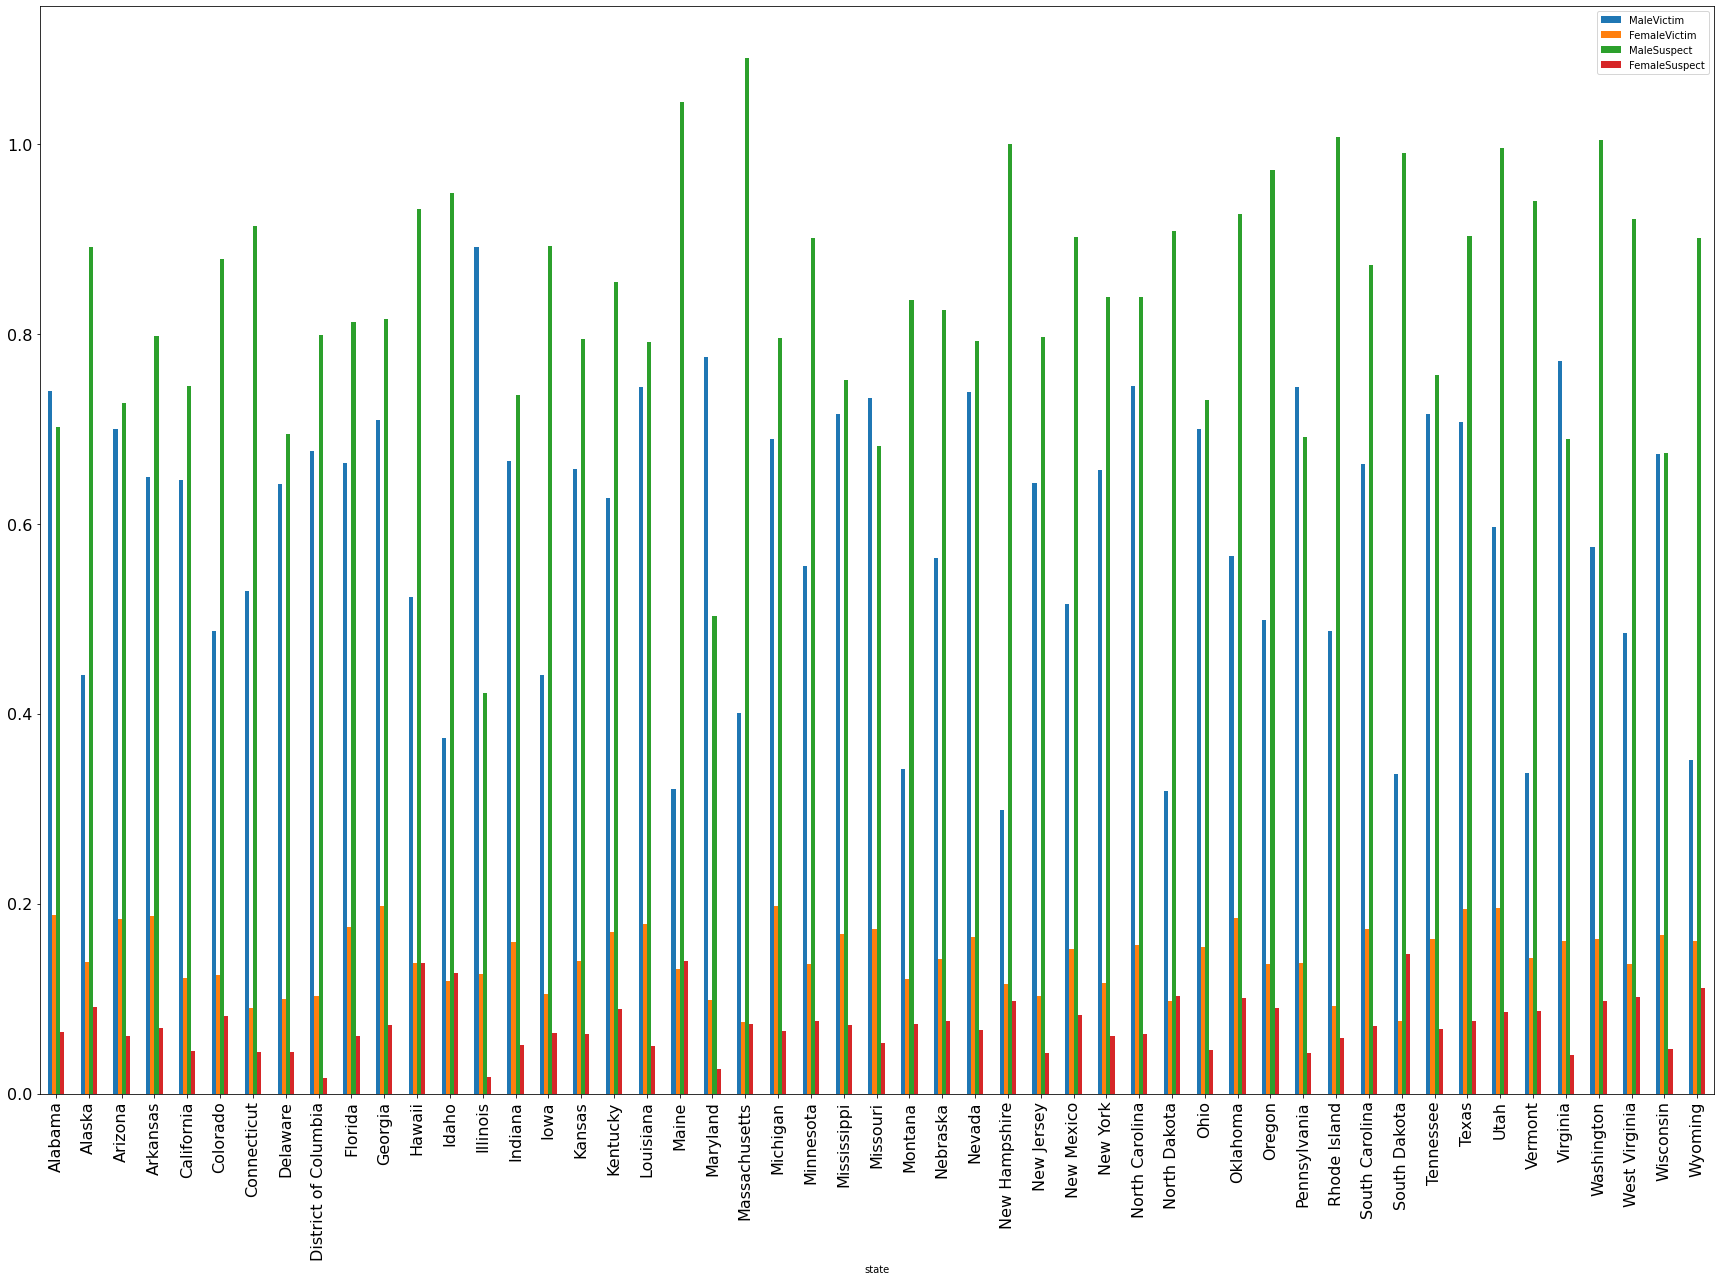

In [104]:
axes = df4.plot.bar(rot=90, figsize=(30,20), fontsize=16)


In [128]:
df5 = df3[['state','n_killed']]

In [134]:

states = df5.state.unique()
states

array(['Ohio', 'Colorado', 'North Carolina', 'Oklahoma', 'New Mexico',
       'Louisiana', 'District of Columbia', 'California', 'Delaware',
       'Utah', 'Georgia', 'Michigan', 'Mississippi', 'Illinois',
       'Missouri', 'New York', 'Pennsylvania', 'Arizona', 'Kentucky',
       'Washington', 'Maryland', 'New Jersey', 'Indiana', 'Virginia',
       'Tennessee', 'Texas', 'South Carolina', 'Florida', 'Connecticut',
       'Kansas', 'West Virginia', 'Nebraska', 'Minnesota', 'Alabama',
       'Massachusetts', 'Wisconsin', 'Hawaii', 'Rhode Island', 'Arkansas',
       'Alaska', 'Iowa', 'Oregon', 'Wyoming', 'Nevada', 'North Dakota',
       'Montana', 'Maine', 'New Hampshire', 'Idaho', 'Vermont',
       'South Dakota'], dtype=object)

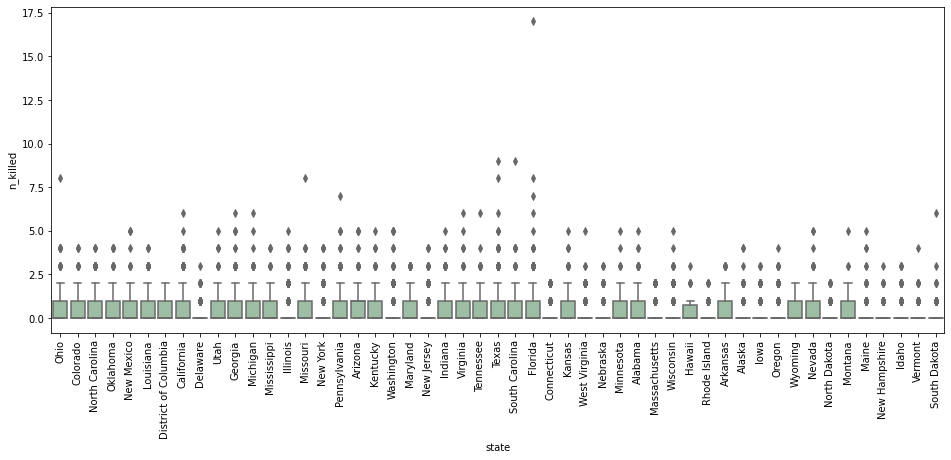

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16, 6))
plt.xticks(rotation=90 ) 
sns.boxplot( x='state', y='n_killed', data=df5, color='#99c2a2')
#ax = sns.swarmplot(x="state", y="n_killed", data=df5, color='#7d0013')
plt.show()

In [150]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('n_killed ~ C(state)', data=df5).fit()
anova_table = sm.stats.anova_lm(model, typ=3)
anova_table

,sum_sq,df,F,PR(>F)
Intercept,685.584000,1.0,2323.956594,0.0
C(state),1350.090719,50.0,91.529331,0.0
Residual,49026.366722,166187.0,NaN,NaN


In [162]:
import statsmodels.stats.multicomp as multi

mcDate = multi.MultiComparison(df['n_killed'],df['state'])
Results = mcDate.tukeyhsd()
print(Results)


              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
       group1               group2        meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------
             Alabama               Alaska  -0.1403  0.001 -0.2175 -0.0631   True
             Alabama              Arizona   0.1656  0.001  0.1047  0.2265   True
             Alabama             Arkansas  -0.0773  0.001 -0.1337  -0.021   True
             Alabama           California    0.002    0.9 -0.0359  0.0398  False
             Alabama             Colorado  -0.0402 0.7986 -0.0991  0.0187  False
             Alabama          Connecticut   -0.264  0.001 -0.3191 -0.2089   True
             Alabama             Delaware  -0.2567  0.001 -0.3226 -0.1908   True
             Alabama District of Columbia  -0.1168  0.001 -0.1818 -0.0519   True
             Alabama              Florida  -0.0611  0.001 -0.0999 -0.0223   True
             Alabama        

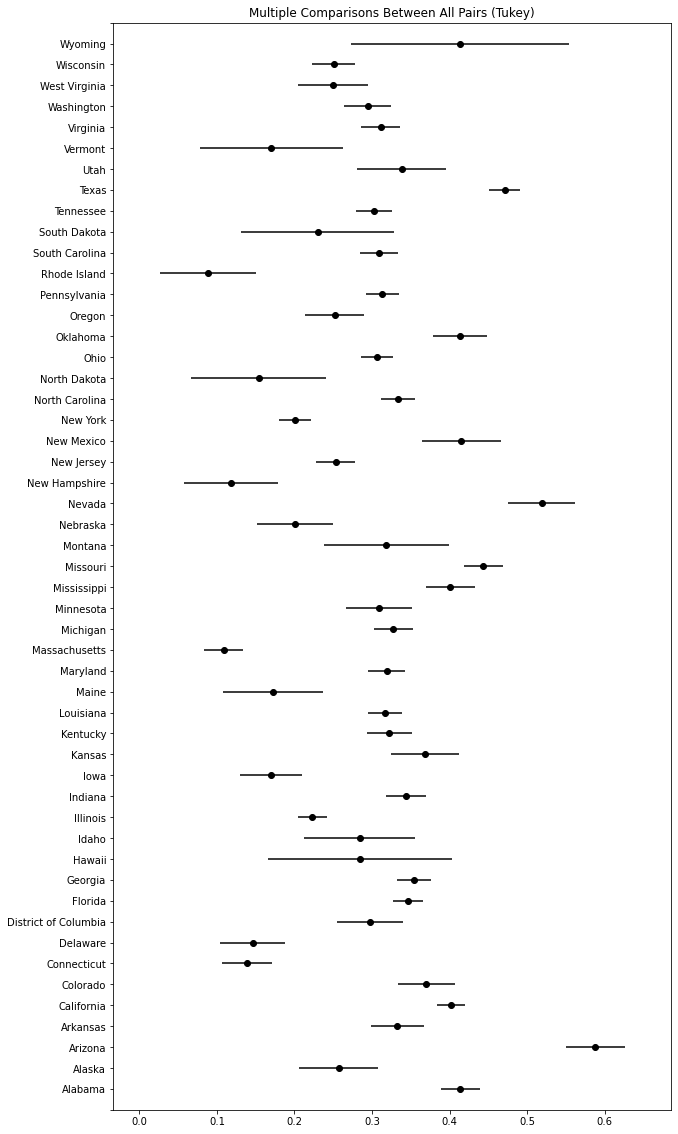

In [181]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df5['n_killed'],     # Data
                          groups=df5['state'],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous(figsize=(10,20))    # Plot group confidence intervals


In [62]:
df3.describe()

,n_killed,n_injured,MaleVictim,FealeVictim,MaleSuspect,FemaleSuspect,ChildVictim,ChildSuspect,TeenVictim,TeenSuspect,AdultVictim,AdultSuspect,FemaleVictim
count,166238.000000,166238.000000,166238.000000,166238.000000,166238.000000,166238.000000,166238.000000,166238.000000,166238.000000,166238.000000,166238.000000,166238.000000,166238.000000
mean,0.317232,0.505739,0.676139,0.149797,0.774618,0.058266,0.016885,0.002358,0.058627,0.057285,0.749690,0.772465,0.149924
std,0.550491,0.680628,0.666634,0.404634,0.850256,0.257396,0.148858,0.049241,0.271710,0.296918,0.705893,0.868054,0.404743
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,17.000000,17.000000,16.000000,18.000000,60.000000,7.000000,8.000000,2.000000,27.000000,6.000000,13.000000,63.000000,18.000000


<AxesSubplot:>

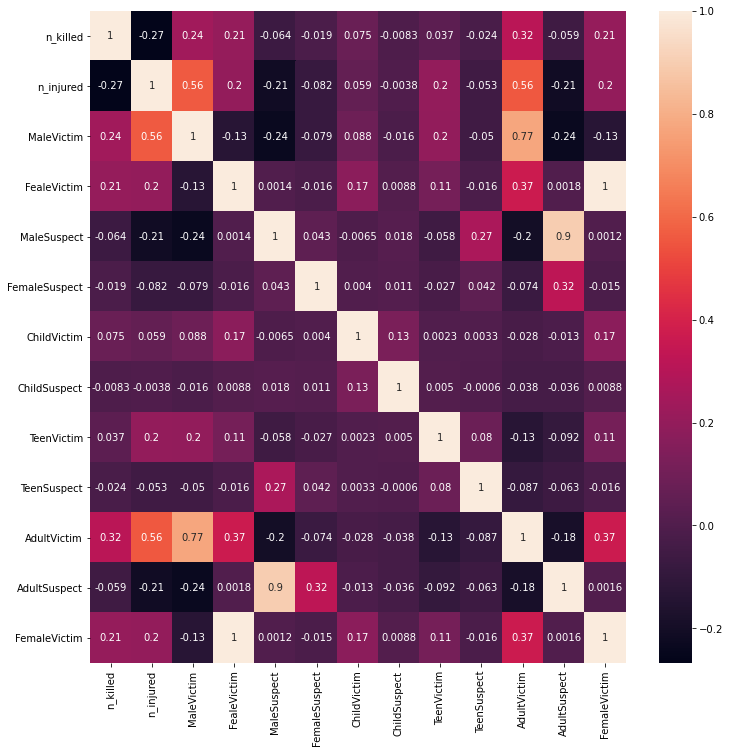

In [63]:
corr2 = df3[df3.columns.values].corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr2, annot=True)

In [105]:
df3

,state,n_killed,n_injured,primary_characteristic,MaleVictim,FealeVictim,MaleSuspect,FemaleSuspect,ChildVictim,ChildSuspect,TeenVictim,TeenSuspect,AdultVictim,AdultSuspect,FemaleVictim
2,Ohio,1.0,3.0,Shot - Wounded/Injured,3,0,2,0,0,0,0,0,3,2,0
3,Colorado,4.0,0.0,"Shot - Dead (murder, accidental, suicide)",2,1,1,0,0,0,0,0,3,1,1
4,North Carolina,2.0,2.0,Shot - Wounded/Injured,2,1,0,1,0,0,1,0,2,1,1
5,Oklahoma,4.0,0.0,"Shot - Dead (murder, accidental, suicide)",0,4,2,0,0,0,0,0,4,2,4
6,New Mexico,5.0,0.0,"Shot - Dead (murder, accidental, suicide)",2,3,1,0,3,0,0,1,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239672,Louisiana,0.0,0.0,Shots Fired - No Injuries,0,0,0,1,0,0,0,0,0,1,0
239673,Louisiana,1.0,0.0,"Shot - Dead (murder, accidental, suicide)",1,0,1,0,0,0,0,0,1,1,0
239674,Louisiana,0.0,1.0,Shot - Wounded/Injured,1,0,0,0,0,0,0,0,1,0,0
239675,Texas,1.0,0.0,"Shot - Dead (murder, accidental, suicide)",1,0,0,0,0,0,0,0,1,0,0


In [108]:
df_texas=df3[df3['state']=='Texas']

In [109]:
df_texas

,state,n_killed,n_injured,primary_characteristic,MaleVictim,FealeVictim,MaleSuspect,FemaleSuspect,ChildVictim,ChildSuspect,TeenVictim,TeenSuspect,AdultVictim,AdultSuspect,FemaleVictim
102,Texas,1.0,3.0,Shot - Wounded/Injured,2,2,1,0,0,0,0,0,4,1,2
152,Texas,0.0,4.0,Shot - Wounded/Injured,4,0,0,0,0,0,0,0,4,0,0
202,Texas,5.0,0.0,"Shot - Dead (murder, accidental, suicide)",4,0,0,1,3,0,0,0,1,1,0
218,Texas,4.0,0.0,"Shot - Dead (murder, accidental, suicide)",4,0,0,0,0,0,0,0,4,0,0
306,Texas,0.0,2.0,Shot - Wounded/Injured,2,0,1,0,0,0,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239557,Texas,1.0,0.0,"Shot - Dead (murder, accidental, suicide)",1,0,1,0,0,0,0,0,1,1,0
239605,Texas,0.0,2.0,Shot - Wounded/Injured,2,0,0,0,0,0,0,0,2,0,0
239626,Texas,0.0,1.0,Shot - Wounded/Injured,1,0,1,0,0,0,0,0,1,1,0
239651,Texas,0.0,1.0,Shot - Wounded/Injured,1,0,1,0,0,0,0,0,1,1,0


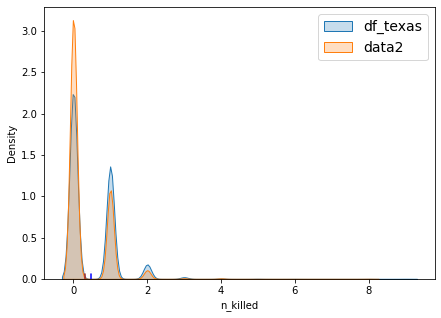

In [110]:
df_texas=df3[df3['state']=='Texas']['n_killed']
df_ohio=df3[df3['state']=='Ohio']['n_killed']
plt.figure(figsize=(7,5))
sns.kdeplot(df_texas,shade=True)
sns.kdeplot(df_ohio,shade=True)
plt.legend(['df_texas','data2'],fontsize=14)
plt.vlines(x=df_texas.mean(),ymin=0,ymax=0.09,color='blue',linestyle='--')
plt.vlines(x=df_ohio.mean(),ymin=0,ymax=0.09,color='brown',linestyle='--')
plt.show()

In [119]:
df_texas=df3[df3['state']=='Texas']
df_ohio=df3[df3['state']=='Ohio']

In [122]:
df_all = pd.concat([df_texas,df_ohio])

In [123]:
df_all

,state,n_killed,n_injured,primary_characteristic,MaleVictim,FealeVictim,MaleSuspect,FemaleSuspect,ChildVictim,ChildSuspect,TeenVictim,TeenSuspect,AdultVictim,AdultSuspect,FemaleVictim
102,Texas,1.0,3.0,Shot - Wounded/Injured,2,2,1,0,0,0,0,0,4,1,2
152,Texas,0.0,4.0,Shot - Wounded/Injured,4,0,0,0,0,0,0,0,4,0,0
202,Texas,5.0,0.0,"Shot - Dead (murder, accidental, suicide)",4,0,0,1,3,0,0,0,1,1,0
218,Texas,4.0,0.0,"Shot - Dead (murder, accidental, suicide)",4,0,0,0,0,0,0,0,4,0,0
306,Texas,0.0,2.0,Shot - Wounded/Injured,2,0,1,0,0,0,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239465,Ohio,0.0,0.0,Non-Shooting Incident,0,0,1,0,0,0,0,0,0,1,0
239532,Ohio,0.0,0.0,Non-Shooting Incident,0,0,1,0,0,0,0,0,0,1,0
239562,Ohio,0.0,2.0,Shot - Wounded/Injured,2,0,0,0,0,0,1,0,1,0,0
239611,Ohio,1.0,0.0,"Shot - Dead (murder, accidental, suicide)",1,0,0,0,0,0,0,0,1,0,0
